# Herencia en Programación Orientada a Objetos

Bienvenido/a. En esta lección aprenderás el principio de herencia, clave para la reutilización y organización eficiente del código en POO.

## Objetivos
- Comprender qué es la herencia y su importancia en POO.
- Implementar clases base y derivadas en Python.
- Aplicar herencia en ejemplos de la vida real.

---

**Ejemplo de la vida real:** Piensa en una jerarquía de vehículos: todos los autos y motos comparten características comunes, pero cada uno tiene sus particularidades. La herencia permite modelar esto en código.

# Herencia en Programación Orientada a Objetos

La herencia es uno de los conceptos fundamentales de la Programación Orientada a Objetos (POO). Permite crear nuevas clases basadas en clases existentes, heredando sus atributos y métodos. Esto promueve la reutilización de código y la creación de jerarquías de clases.

## Explicación

La herencia permite:

1. **Reutilización de código**: Evita la duplicación al compartir funcionalidades comunes.

2. **Extensibilidad**: Facilita la creación de clases especializadas a partir de clases más generales.

3. **Jerarquías de clases**: Organiza el código en estructuras lógicas y relacionadas.

4. **Polimorfismo**: Permite tratar objetos de clases derivadas como objetos de la clase base.

## Ejemplos prácticos

### Ejemplo 1: Herencia básica y uso de `super()`

Veamos un ejemplo de herencia utilizando el concepto de vehículos:

## Explicación del código

1. **Clase base `Vehiculo`**: Define atributos y métodos comunes a todos los vehículos.

2. **Clase derivada `Carro`**: Hereda de `Vehiculo` y añade un atributo específico (`num_puertas`).

3. **Clase derivada `Motocicleta`**: Hereda de `Vehiculo`, añade un atributo (`tipo`) y un método específico (`hacer_caballito`).

4. **Uso de `super()`**: En las clases derivadas, se usa para llamar al constructor de la clase base.

5. **Sobrescritura de métodos**: `Carro` sobrescribe `obtener_info()` para incluir información adicional.

6. **Polimorfismo**: El bucle for trata tanto a `Carro` como a `Motocicleta` como `Vehiculo`.

In [1]:
class Vehiculo:
    def __init__(self, marca: str, modelo: str, year: int) -> None:
        self.marca: str = marca
        self.modelo: str = modelo
        self.year: int = year
        self._velocidad: int = 0

    def acelerar(self, incremento: int) -> None:
        self._velocidad += incremento

    def frenar(self, decremento: int) -> None:
        self._velocidad = max(0, self._velocidad - decremento)

    def obtener_info(self) -> str:
        return f"{self.marca} {self.modelo} ({self.year}), Velocidad: {self._velocidad} km/h"

class Carro(Vehiculo):
    def obtener_info(self) -> str:
        return super().obtener_info() + "de 4 puertas"

class Motocicleta(Vehiculo):
    def __init__(self, marca: str, modelo: str, year: int, tipo: str):
        super().__init__(marca=marca, modelo=modelo, year=year)
        self.tipo: str = tipo

    def hacer_caballito(self) -> None:
        if self._velocidad > 0:
            print(f"{self.marca} {self.modelo} está haciendo un caballito!")
        else:
            print("La motocicleta necesita estar en movimiento para hacer un caballito.")


In [2]:
carro: Carro = Carro(marca="Toyota", modelo="Corolla", year=2022)
moto: Motocicleta = Motocicleta(marca="Honda", modelo="CBR", year=2021, tipo="Deportiva")

vehiculos: list[Vehiculo] = [carro, moto]

for v in vehiculos:
    v.acelerar(incremento=50)
    print(v.obtener_info())

moto.hacer_caballito()

Toyota Corolla (2022), Velocidad: 50 km/hde 4 puertas
Honda CBR (2021), Velocidad: 50 km/h
Honda CBR está haciendo un caballito!


## Beneficios de la herencia en este ejemplo

1. **Reutilización de código**: Las clases derivadas heredan funcionalidades comunes de `Vehiculo`.

2. **Extensibilidad**: Podemos añadir fácilmente nuevos tipos de vehículos (por ejemplo, `Camion`) sin duplicar código.

3. **Especialización**: Cada clase derivada puede añadir atributos y métodos específicos.

4. **Polimorfismo**: Podemos tratar diferentes tipos de vehículos de manera uniforme.

### Ejemplo 2: Herencia básica y uso de `super()`

En este ejemplo:

1. `Animal` es la clase base que define atributos y métodos comunes.

2. `Perro` hereda de `Animal` y añade un atributo adicional (`color`).

3. `super().__init__()` se usa para llamar al constructor de la clase base.

4. `Perro` añade un nuevo método `ladrar()`.

Se usa `super()` para llamar al constructor de la clase base y inicializar los atributos heredados, por ejemplo, que acá la clase padre `Animal` tiene los atributos `especie` y `edad`, y en la clase hija `Perro` se añade el atributo `color`.

In [3]:
class Animal:
    def __init__(self, especie: str, edad: int) -> None:
        self.especie: str = especie
        self.edad: int = edad

    def describeme(self) -> None:
        print(f"Soy un Animal del tipo {type(self).__name__}")

class Perro(Animal):
    def __init__(self, especie: str, edad: int, color: str) -> None:
        super().__init__(especie=especie, edad=edad)
        self.color: str = color

    def ladrar(self) -> None:
        print("Guau!")

class Vaca(Animal):
    pass

In [4]:
mi_perro = Perro(especie="Canino", edad=5, color="Marrón")
mi_perro.describeme()
mi_perro.ladrar()
print(f"Especie: {mi_perro.especie}, Edad: {mi_perro.edad}, Color: {mi_perro.color}")

mi_vaca = Vaca(especie="Bovino", edad=10)
mi_vaca.describeme()
print(f"Especie: {mi_vaca.especie}, Edad: {mi_vaca.edad}")

Soy un Animal del tipo Perro
Guau!
Especie: Canino, Edad: 5, Color: Marrón
Soy un Animal del tipo Vaca
Especie: Bovino, Edad: 10


### Ejemplo 2: Extensión y modificación de métodos

Este ejemplo muestra:

1. Sobrescritura de métodos: `Perro` y `Pez` modifican `hablar()` y `moverse()`.

2. Extensión de métodos: `Perro.moverse()` llama al método de la clase base y añade funcionalidad.
3. Extensión de métodos: `Ave` no modifica el método de la clase base.

In [5]:
class Animal:
    def hablar(self) -> None:
        print("El animal hace un sonido")

    def moverse(self) -> None:
        print("El animal se mueve")

class Perro(Animal):
    def hablar(self) -> None:
        print("El perro ladra")

    def moverse(self) -> None:
        super().moverse()
        print("El perro corre")

class Pez(Animal):
    def hablar(self) -> None:
        print("El pez no hace sonidos")

    def moverse(self) -> None:
        print("El pez nada")

class Ave(Animal):
    pass


In [6]:
list_animal: list[Animal] = [Animal(), Perro(), Pez(), Ave()]

for animal in list_animal:
    animal.hablar()
    animal.moverse()
    print()

El animal hace un sonido
El animal se mueve

El perro ladra
El animal se mueve
El perro corre

El pez no hace sonidos
El pez nada

El animal hace un sonido
El animal se mueve



## Ejercicios prácticos y preguntas de reflexión

1. Crea una clase base `Animal` y dos clases derivadas `Perro` y `Gato` con métodos y atributos propios.
2. Modifica la jerarquía de vehículos para agregar una clase `Camion` que herede de `Vehiculo`.
3. ¿Por qué es útil la herencia en el desarrollo de software?

### Autoevaluación
- ¿Qué ventajas aporta la herencia al desarrollo de software?
- ¿Puedes dar un ejemplo de herencia en tu vida diaria?

In [7]:
class Vehiculo:
    def __init__(self, velocidad_maxima: int) -> None:
        self.velocidad_maxima: int = velocidad_maxima

    def describir(self) -> None:
        print(f"Vehículo con velocidad máxima de {self.velocidad_maxima} km/h")

class Volador:
    def volar(self) -> None:
        print("Estoy volando")

class Acuatico:
    def nadar(self) -> None:
        print("Estoy nadando")

class Anfibio(Vehiculo, Volador, Acuatico):
    def __init__(self, velocidad_maxima: int) -> None:
        super().__init__(velocidad_maxima)

    def describir(self) -> None:
        super().describir()
        print("Soy un vehículo anfibio")

In [8]:
anfibio = Anfibio(velocidad_maxima=200)
anfibio.describir()
anfibio.volar()
anfibio.nadar()

Vehículo con velocidad máxima de 200 km/h
Soy un vehículo anfibio
Estoy volando
Estoy nadando


### Ejemplo 4: No sobrescribir el método `super()` cuando se añaden atributos en la clase hija

Este ejemplo ilustra:

1. `Animal` es la clase base que define atributos comunes (`nombre` y `edad`) y un método `describir()`.

2. `Perro` hereda de `Animal` y añade un atributo adicional (`raza`).

3. El constructor de `Perro` no llama a `super().__init__()`, lo que puede llevar a errores.

4. `Perro` sobrescribe el método `describir()`, pero asume que los atributos `nombre` y `edad` existen.

In [9]:
class Animal:
    def __init__(self, nombre: str, edad: int) -> None:
        self.nombre: str = nombre
        self.edad: int = edad

    def describir(self) -> str:
        return f"{self.nombre} tiene {self.edad} años"

class Perro(Animal):
    def __init__(self, nombre: str, edad: int, raza: str) -> None:
        self.raza: str = raza
        # Nota: No se llama a super().__init__()

    def describir(self) -> str:
        return f"{self.nombre} es un {self.raza} de {self.edad} años"


In [10]:
try:
    mi_perro = Perro(nombre="Fido", edad=5, raza="Labrador")
    print(mi_perro.describir())
except AttributeError as e:
    print(f"Error: {e}")


Error: 'Perro' object has no attribute 'nombre'


- Al no llamar a `super().__init__()` en el constructor de `Perro`, los atributos `nombre` y `edad` no se inicializan.

- El método `describir()` de `Perro` intenta acceder a `self.nombre` y `self.edad`, que no existen.

Para corregir este error, deberíamos modificar el constructor de `Perro` así:

In [11]:
class Perro(Animal):
    def __init__(self, nombre: str, edad: int, raza: str) -> None:
        super().__init__(nombre=nombre, edad=edad)
        self.raza: str = raza

In [12]:
mi_perro = Perro(nombre="Fido", edad=5, raza="Labrador")
print(mi_perro.describir())

Fido tiene 5 años


### Ejemplo 5: Herencia múltiple y resolución de conflictos

Python permite la herencia múltiple. Cuando varias clases base tienen un atributo o método con el mismo nombre, Python usa el orden de resolución de métodos (MRO) para determinar cuál usar.

Este ejemplo ilustra:

1. `C` hereda `x` de `A`, mientras que `D` hereda `x` de `B`, debido al orden en que se declaran las clases base.


2. La clase `C` hereda de `A` y `B`, por lo que `C` tiene acceso a los atributos y métodos de ambas clases.

3. Sin embargo, cuando se accede a `x` desde una instancia de `C`, se usa el valor de `x` de la primera clase base declarada en la jerarquía de herencia.

4. El método `__mro__` muestra el orden de resolución de métodos para una clase.

In [13]:
class A:
    x: str = "A"

class B:
    x: str = "B"

class C(A, B):
    pass

class D(B, A):
    pass

In [14]:

print(C.x)  # Output: A
print(D.x)  # Output: B

print(C.__mro__)  # Muestra el orden de resolución de métodos para C
print(D.__mro__)  # Muestra el orden de resolución de métodos para D

A
B
(<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>)
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>)


### Ejemplo 6: Interfaces y métodos abstractos

Python no tiene un concepto formal de interfaces, pero se pueden simular usando clases abstractas. Sin embargo, a diferencia de algunos otros lenguajes, Python no requiere que sobrescribas los métodos abstractos a menos que uses el módulo `abc` (Abstract Base Classes).

Este ejemplo ilustra:

1. `InterfazAnimal` define un método abstracto `hacer_sonido()`.

2. `Perro` implementa correctamente la interfaz.

3. `GatoIncompleto` no implementa el método abstracto, lo que resulta en un error al intentar instanciarla.

In [15]:
from abc import ABC, abstractmethod

class InterfazAnimal(ABC):
    @abstractmethod
    def hacer_sonido(self) -> str:
        pass

class Perro(InterfazAnimal):
    def hacer_sonido(self) -> str:
        return "Guau!"

class GatoIncompleto(InterfazAnimal):
    pass  # No implementa hacer_sonido

In [16]:
mi_perro = Perro()
print(mi_perro.hacer_sonido())  # Output: Guau!

Guau!


In [17]:
try:
    mi_gato = GatoIncompleto()
except TypeError as e:
    print(f"Error: {e}")  # Output: Error: Can't instantiate abstract class GatoIncompleto with abstract method hacer_sonido

Error: Can't instantiate abstract class GatoIncompleto without an implementation for abstract method 'hacer_sonido'


In [ ]:
class Persona:
    def __init__(self, nombre: str, edad: int) -> None:
        self.nombre = nombre
        self.edad = edad
    def presentarse(self) -> str:
        return f"Hola, soy {self.nombre} y tengo {self.edad} años."
    
    def obtener_rol(self) -> str:
        return "Soy una persona."

class Ingeniero(Persona):
    def __init__(self,nombre: str, edad: str, ingenieria: str) -> None:
        super().__init__(nombre, edad)
        self.ingenieria = ingenieria
    
    def obtener_rol(self) -> str:
        return f"Soy ingeniero de {self.ingenieria}."

class Profesor(Persona):
    def __init__(self, nombre: str, edad: int, materia: str) -> None:
        super().__init__(nombre, edad)  
        self.materia = materia

    def obtener_rol(self) -> str:
        return f"Soy profesor de {self.materia}."

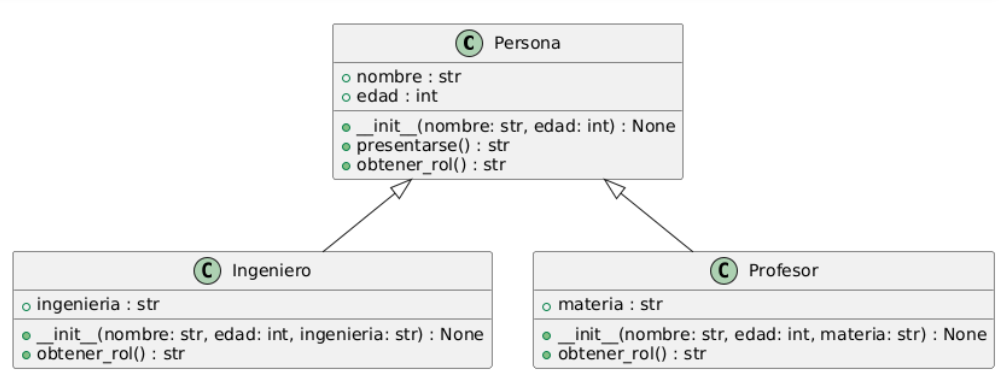

## Explicación de conceptos clave

1. **Uso de `super()`**: 

   - Permite llamar a métodos de la clase base.

   - Útil para extender funcionalidad sin duplicar código.

   - En herencia múltiple, sigue el orden de resolución de métodos (MRO).

2. **Extensión y modificación de métodos**:

   - Sobrescritura: Redefinir completamente un método de la clase base.

   - Extensión: Añadir funcionalidad adicional al método de la clase base.

3. **Herencia múltiple**:

   - Permite heredar de varias clases base.

   - Proporciona mayor flexibilidad pero puede aumentar la complejidad.

   - Requiere cuidado para evitar conflictos entre métodos de diferentes clases base.

## Conclusión

La herencia es una herramienta poderosa en la POO que permite crear jerarquías de clases flexibles y reutilizables. Ofrece varias ventajas:

- **Reutilización de código**: Reduce la duplicación y promueve la consistencia.

- **Extensibilidad**: Facilita la adición de nuevas funcionalidades y tipos de objetos.

- **Organización**: Ayuda a estructurar el código de manera lógica y jerárquica.

- **Polimorfismo**: Permite tratar objetos de clases derivadas de manera uniforme.

- **Herencia sin sobrescritura**: Permite reutilizar código de la clase base sin modificaciones, lo cual es útil cuando la funcionalidad base es suficiente.

- **Herencia múltiple**: Ofrece flexibilidad pero requiere cuidado para evitar conflictos. El MRO de Python proporciona una forma predecible de resolver estos conflictos.

- **Interfaces en Python**: Aunque Python no tiene interfaces formales, las clases abstractas con `abc` pueden simular este comportamiento, forzando la implementación de métodos en las clases hijas.

- **Flexibilidad de Python**: Sin `abc`, Python permite una implementación más flexible de "interfaces", lo que puede ser útil en ciertos escenarios pero también puede llevar a errores si no se manejan correctamente.

Sin embargo, es importante usar la herencia con cuidado:

- La herencia profunda puede llevar a jerarquías complejas y difíciles de mantener.

- En algunos casos, la composición puede ser una alternativa más flexible que la herencia.

- Es crucial diseñar cuidadosamente las jerarquías de clases para evitar problemas de diseño a largo plazo.

- La herencia es una herramienta poderosa, pero no debe ser utilizada indiscriminadamente.

- Las interfaces en Python no son estrictamente interfaces como en otros lenguajes, pero proporcionan una forma de definir contratos que las clases deben cumplir.

En el desarrollo de software moderno, la herencia se utiliza ampliamente en frameworks, bibliotecas y aplicaciones para crear código modular, extensible y mantenible. Dominar los conceptos de herencia es esencial para cualquier desarrollador que trabaje con programación orientada a objetos, ya que permite crear sistemas más flexibles y adaptables a cambios futuros.

## Referencias y recursos
- [Documentación oficial de Python: herencia](https://docs.python.org/es/3/tutorial/classes.html#inheritance)
- [Herencia en Python - W3Schools](https://www.w3schools.com/python/python_inheritance.asp)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)